<a href="https://colab.research.google.com/github/GwiYeonKim/modulabs_repository/blob/main_quest/Quest_03_AARRR_%EB%B6%84%EC%84%9D_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D_%EA%B9%80%EA%B7%80%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **문제 1: 데이터 로드 및 탐색**

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [50]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/online_retail_II.xlsx'
df1 = pd.read_excel(file_path, sheet_name = 'Year 2009-2010', engine='openpyxl')
df2 = pd.read_excel(file_path, sheet_name = 'Year 2010-2011',engine='openpyxl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
display(df1.head(3))
display(df2.head(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [51]:
# 합치기
df_combined = pd.concat([df1, df2], ignore_index=True)

In [52]:
df_combined.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [53]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [55]:
df_combined.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [56]:
# 1. InoviceDate 컬럼은 날짜 형식임.
## df_combined.info() 확인 결과 : 4   InvoiceDate  1067371 non-null  datetime64[ns]
# 2. Customer ID 결측치 제거
df_cleaned = df_combined.dropna(subset=['Customer ID'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [57]:
# 3. Customer ID를 정수현으로 변환
df_cleaned['Customer ID'] = df_cleaned['Customer ID'].astype(int)
df_cleaned.info()

<ipython-input-57-50129c048682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Customer ID'] = df_cleaned['Customer ID'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


In [58]:
#4. InvoiceDate를 기준으로 데이터를 정렬
df_cleaned = df_cleaned.sort_values(by='InvoiceDate')
df_cleaned.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085,United Kingdom
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085,United Kingdom


In [59]:
# 5. 금액을 나타내는 새로운 컬럼 Total 을 생성하세요 (Quantity와 Price를 곱한 값).
df_cleaned['Total'] = df_cleaned['Quantity'] * df_cleaned['Price']
df_cleaned.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


### **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

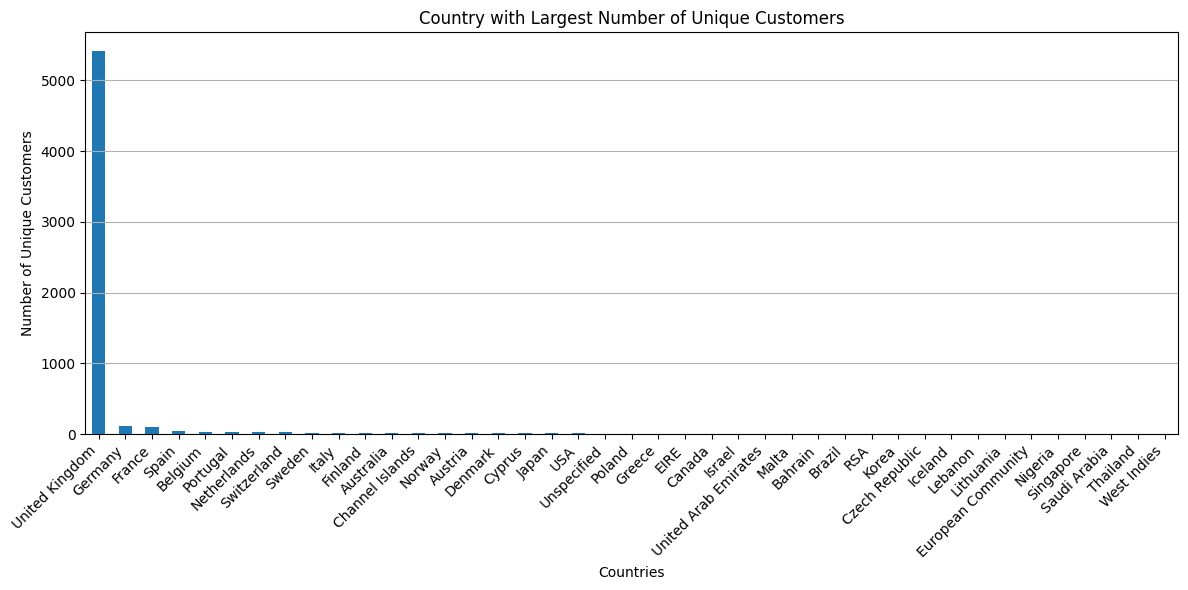

In [65]:
# 나라별 고유 고객 수 계산
import matplotlib.pyplot as plt

country_customer_counts = df_cleaned.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
country_customer_counts.plot(kind='bar',align='center')

plt.title('Country with Largest Number of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### **문제 4: Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

In [74]:
import matplotlib.pyplot as plt
# 고객별 첫 구매 날짜

first_purchase= df_cleaned.groupby('Customer ID')['InvoiceDate'].min()

# 'YYYY-MM' 형식으로 변환 (월별 집계용)
first_purchase_month = first_purchase.dt.to_period('M')

# 월별 신규 유입 고객 수 계산
new_customers_per_month = first_purchase_month.value_counts().sort_index()
display(new_customers_per_month)

# 시리즈를 datetime index로 변환 (시각화에 적합하게)
new_customers_per_month.index = new_customers_per_month.index.to_timestamp()


,count
InvoiceDate,
2009-12,1045
2010-01,394
2010-02,363
2010-03,436
2010-04,291
2010-05,254
2010-06,269
2010-07,183
2010-08,158


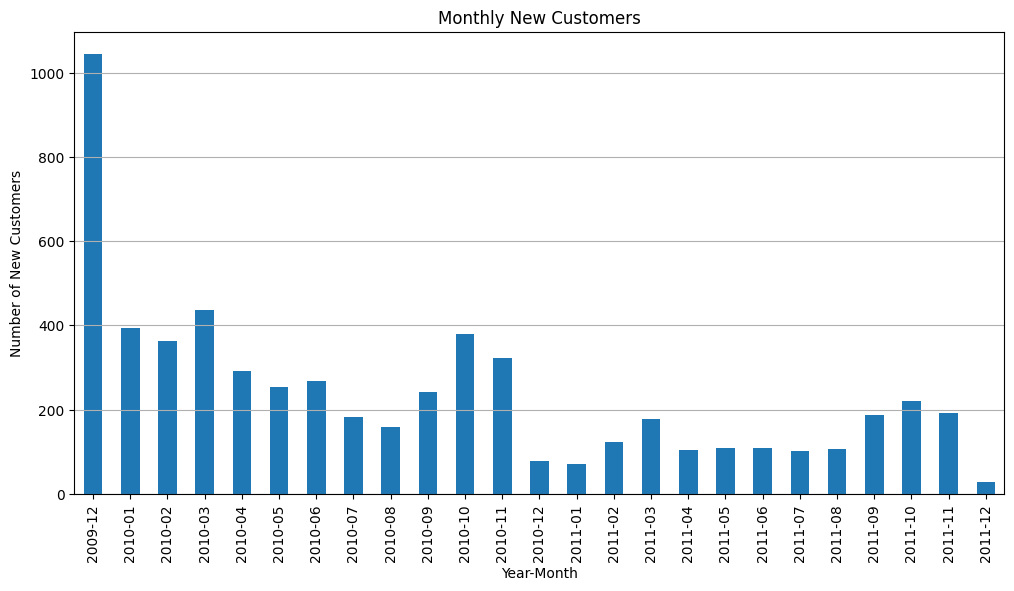

In [77]:
# 시각화
plt.figure(figsize=(12, 6))
# x축 index를 '연-월' 문자열로 변환
new_customers_per_month.index = new_customers_per_month.index.strftime('%Y-%m')

new_customers_per_month.plot(kind='bar',align='center')

plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.grid(axis='y')
plt.show()

### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [80]:
# Customer ID 기준으로 총 구매 금액 집계
customer_total = df_cleaned.groupby('Customer ID')['Total'].sum()

# 활성화된 고객 필터링 (Total >= 50)
activated_customers = customer_total[customer_total >= 50]

# 전체 고객 수와 활성화된 고객 수 비교
total_customers = customer_total.shape[0]
activated_count = activated_customers.shape[0]
activation_rate = activated_count / total_customers * 100

# 결과 출력
print(f'총 고객 수: {total_customers}')
print(f'활성화된 고객 수 (첫 구매 후 £50 이상 구매 고객): {activated_count}')
print(f'고객 활성화율: {activation_rate:.2f}%')

총 고객 수: 5942
활성화된 고객 수 (첫 구매 후 £50 이상 구매 고객): 5777
고객 활성화율: 97.22%


### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [81]:
# 0. 데이터 형식 확인
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 62.9+ MB


In [84]:
# 1.고객별 첫 구매분기(Cohort) 지정
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['CohortQuarter'] = df_cleaned.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('Q')
df_cleaned['OrderQuarter'] = df_cleaned['InvoiceDate'].dt.to_period('Q')

display(df_cleaned.head(5))
display(df_cleaned.info())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,CohortQuarter,OrderQuarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009Q4,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009Q4,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009Q4,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009Q4,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009Q4,2009Q4


<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Invoice        824364 non-null  object        
 1   StockCode      824364 non-null  object        
 2   Description    824364 non-null  object        
 3   Quantity       824364 non-null  int64         
 4   InvoiceDate    824364 non-null  datetime64[ns]
 5   Price          824364 non-null  float64       
 6   Customer ID    824364 non-null  int64         
 7   Country        824364 non-null  object        
 8   Total          824364 non-null  float64       
 9   CohortQuarter  824364 non-null  period[Q-DEC] 
 10  OrderQuarter   824364 non-null  period[Q-DEC] 
dtypes: datetime64[ns](1), float64(2), int64(2), object(4), period[Q-DEC](2)
memory usage: 75.5+ MB


None

In [86]:
# 2. 코호트 인덱스 생성
def get_cohort_index(df):
    return (df['OrderQuarter'].dt.year - df['CohortQuarter'].dt.year) * 4 + \
           (df['OrderQuarter'].dt.quarter - df['CohortQuarter'].dt.quarter)

df_cleaned['CohortIndex'] = get_cohort_index(df_cleaned)
display(df_cleaned.head(5))
display(df_cleaned['CohortIndex'].unique())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,CohortQuarter,OrderQuarter,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009Q4,2009Q4,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009Q4,2009Q4,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009Q4,2009Q4,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009Q4,2009Q4,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009Q4,2009Q4,0


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [87]:
# 3. 분기별 활성 고객 수 (유니크 Customer ID 수) 계산
cohort_counts = df_cleaned.groupby(['CohortQuarter', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index='CohortQuarter', columns='CohortIndex', values='Customer ID')
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,1045.0,673.0,688.0,619.0,714.0,525.0,517.0,509.0,572.0
2010Q1,1193.0,610.0,573.0,608.0,416.0,431.0,444.0,408.0,NaN
2010Q2,814.0,324.0,348.0,183.0,245.0,227.0,244.0,NaN,NaN
2010Q3,583.0,281.0,148.0,155.0,192.0,188.0,NaN,NaN,NaN
2010Q4,778.0,168.0,196.0,162.0,275.0,NaN,NaN,NaN,NaN
2011Q1,372.0,159.0,125.0,136.0,NaN,NaN,NaN,NaN,NaN
2011Q2,321.0,142.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,395.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# 4. 리텐션율 계산 (0번째 분기를 기준으로 비율화)
retention = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0) * 100
retention

CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,100.0,64.401914,65.837321,59.234450,68.325359,50.239234,49.473684,48.708134,54.736842
2010Q1,100.0,51.131601,48.030176,50.963956,34.870075,36.127410,37.217100,34.199497,NaN
2010Q2,100.0,39.803440,42.751843,22.481572,30.098280,27.886978,29.975430,NaN,NaN
2010Q3,100.0,48.198971,25.385935,26.586621,32.933105,32.246998,NaN,NaN,NaN
2010Q4,100.0,21.593830,25.192802,20.822622,35.347044,NaN,NaN,NaN,NaN
2011Q1,100.0,42.741935,33.602151,36.559140,NaN,NaN,NaN,NaN,NaN
2011Q2,100.0,44.236760,39.563863,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,53.164557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


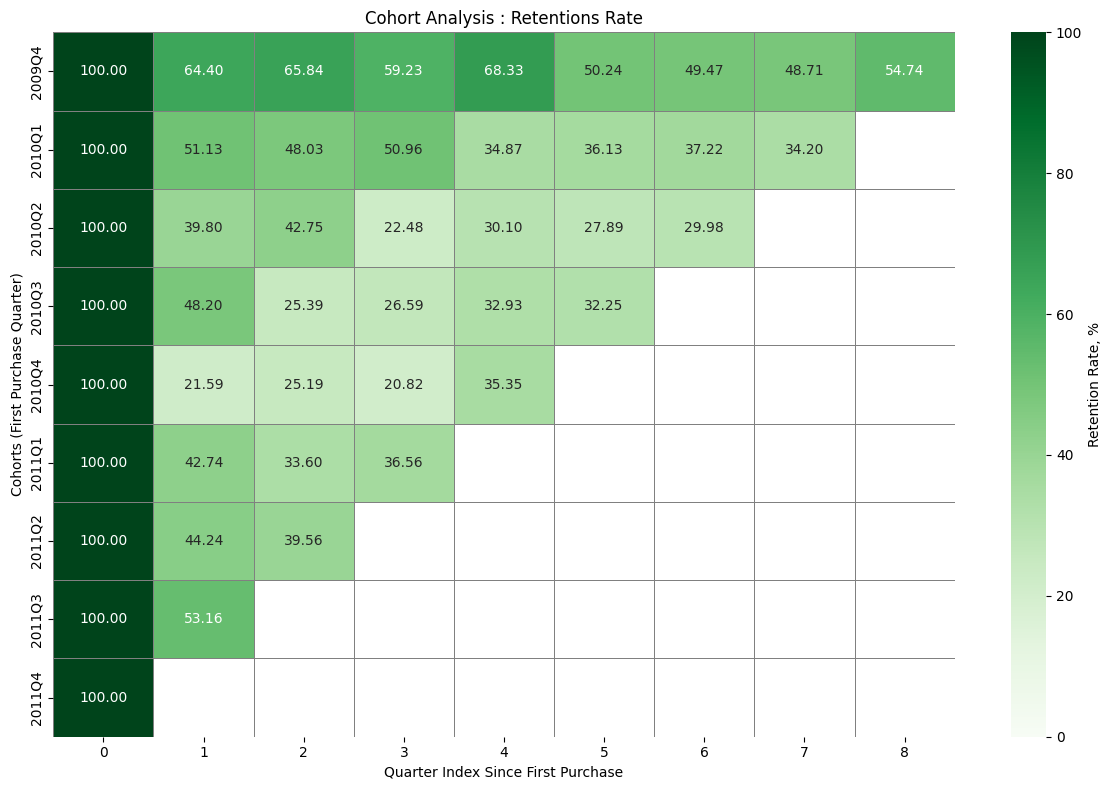

In [91]:
# 5. 시각화: 히트맵
import seaborn as sns

plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)

plt.title('Cohort Analysis : Retentions Rate')
plt.ylabel('Cohorts (First Purchase Quarter)')
plt.xlabel('Quarter Index Since First Purchase')
plt.tight_layout()
plt.show()

### **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

In [92]:
# 0. 데이터 형식 및 컬럼 확인 : InvoiceDate, CohortQuarter, CohortIndex
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Invoice        824364 non-null  object        
 1   StockCode      824364 non-null  object        
 2   Description    824364 non-null  object        
 3   Quantity       824364 non-null  int64         
 4   InvoiceDate    824364 non-null  datetime64[ns]
 5   Price          824364 non-null  float64       
 6   Customer ID    824364 non-null  int64         
 7   Country        824364 non-null  object        
 8   Total          824364 non-null  float64       
 9   CohortQuarter  824364 non-null  period[Q-DEC] 
 10  OrderQuarter   824364 non-null  period[Q-DEC] 
 11  CohortIndex    824364 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4), period[Q-DEC](2)
memory usage: 81.8+ MB


In [95]:
# Cohort 별 평균 구매 수량
quantity_cohort = df_cleaned.groupby(['CohortQuarter', 'CohortIndex'])['Quantity'].mean().reset_index()

# 피벗 테이블 (Cohort x 분기 Index)
quantity_pivot = quantity_cohort.pivot(index='CohortQuarter', columns='CohortIndex', values='Quantity')
quantity_pivot

CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,12.288602,21.076391,13.362480,15.464211,13.549914,15.362895,14.956008,15.968218,14.509715
2010Q1,9.651855,11.982118,11.723858,10.863366,10.647503,10.993354,12.961459,10.211015,NaN
2010Q2,10.437856,11.478243,9.811143,15.442831,14.882952,15.791417,9.594326,NaN,NaN
2010Q3,13.889201,7.990053,9.895508,11.931285,14.125486,10.269787,NaN,NaN,NaN
2010Q4,7.621444,8.344081,8.314231,9.525700,8.693133,NaN,NaN,NaN,NaN
2011Q1,9.814703,13.467717,12.559367,11.576981,NaN,NaN,NaN,NaN,NaN
2011Q2,8.826865,11.271825,9.158496,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,9.202391,6.197705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,9.111207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


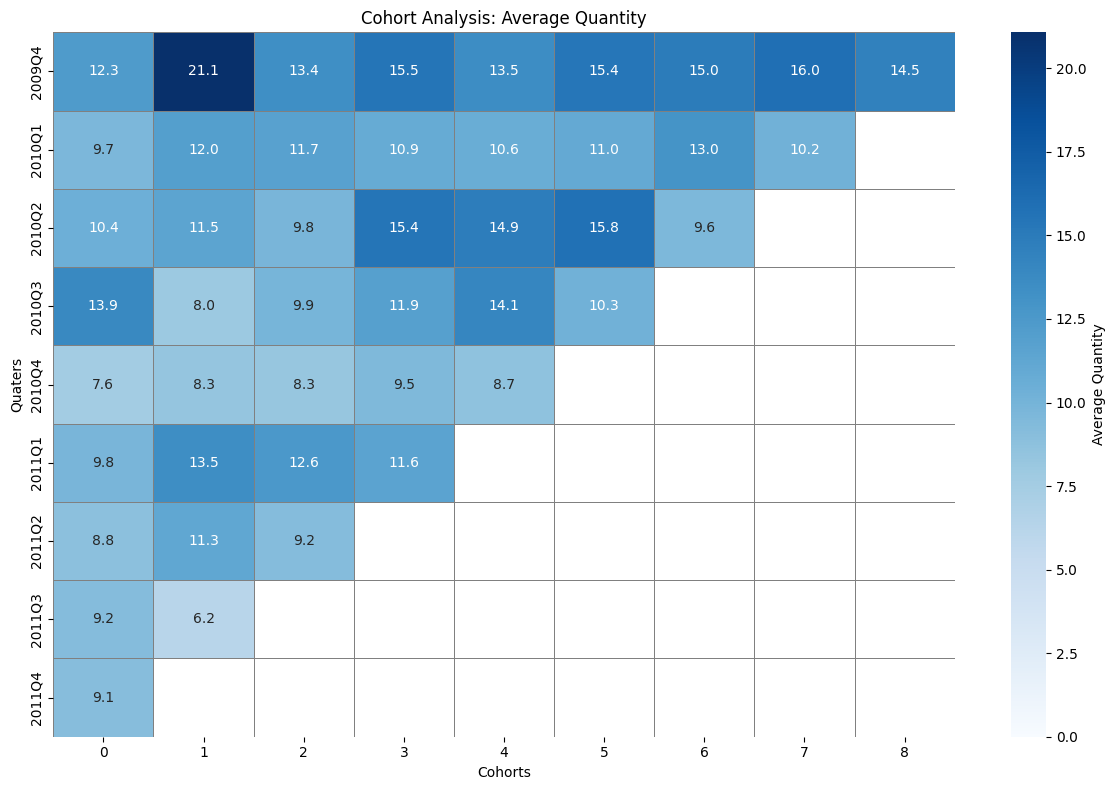

In [98]:
# 히트맵 시각
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    data=quantity_pivot,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)

plt.title('Cohort Analysis: Average Quantity')
plt.xlabel('Cohorts')
plt.ylabel('Quaters')
plt.tight_layout()
plt.show()

### **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

In [99]:
# ARPU = 월별 총 매출 / 월별 고유 고객 수

# 0. 데이터 형식 및 컬럼 확인 : InvoiceDate, Total
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Invoice        824364 non-null  object        
 1   StockCode      824364 non-null  object        
 2   Description    824364 non-null  object        
 3   Quantity       824364 non-null  int64         
 4   InvoiceDate    824364 non-null  datetime64[ns]
 5   Price          824364 non-null  float64       
 6   Customer ID    824364 non-null  int64         
 7   Country        824364 non-null  object        
 8   Total          824364 non-null  float64       
 9   CohortQuarter  824364 non-null  period[Q-DEC] 
 10  OrderQuarter   824364 non-null  period[Q-DEC] 
 11  CohortIndex    824364 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4), period[Q-DEC](2)
memory usage: 81.8+ MB


In [102]:
# 1. 연-월 단위로 그룹화하기 위한 컬럼 생성
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
df_cleaned.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,CohortQuarter,OrderQuarter,CohortIndex,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009Q4,2009Q4,0,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009Q4,2009Q4,0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009Q4,2009Q4,0,2009-12


In [104]:
# 2. 월별 총 매출 및 월별 고객 수 계산
# 월별 총 매출
monthly_revenue = df_cleaned.groupby('YearMonth')['Total'].sum()
display(monthly_revenue)

# 월별 유니크 고객 수
monthly_unique_users = df_cleaned.groupby('YearMonth')['Customer ID'].nunique()
display(monthly_unique_users)


,Total
YearMonth,
2009-12,663272.050
2010-01,531952.902
2010-02,489399.586
2010-03,635996.481
2010-04,560635.022
2010-05,559924.550
2010-06,571459.910
2010-07,562785.900
2010-08,587256.460


,Customer ID
YearMonth,
2009-12,1045
2010-01,786
2010-02,807
2010-03,1111
2010-04,998
2010-05,1062
2010-06,1095
2010-07,988
2010-08,964


In [105]:
# 3. ARPU 계산
# 월별 ARPU = 총 매출 / 유니크 고객 수
arpu = (monthly_revenue / monthly_unique_users).round(2)
arpu

,0
YearMonth,
2009-12,634.71
2010-01,676.78
2010-02,606.44
2010-03,572.45
2010-04,561.76
2010-05,527.24
2010-06,521.88
2010-07,569.62
2010-08,609.19


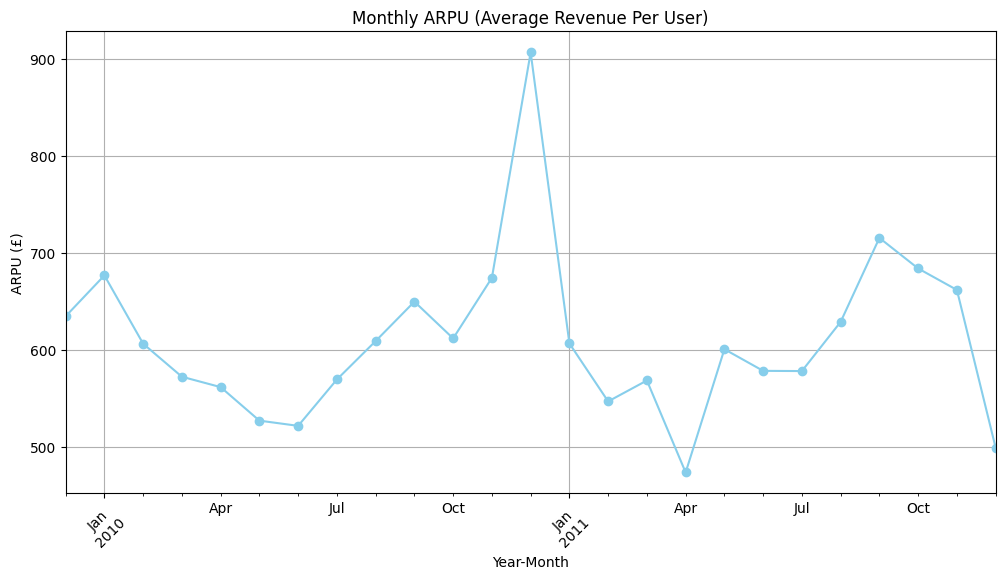

In [106]:
# 4. 시각화
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [107]:
# 평균 구매 금액: 고객별 총금액 / 총거래수
# 평균 구매 빈도: 총 거래수 / 유지 일수
# 고객 유지 기간: (마지막 구매일 - 첫 구매일).days + 1

# 0.데이터 확인하기 : InvoiceDate, Total
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Invoice        824364 non-null  object        
 1   StockCode      824364 non-null  object        
 2   Description    824364 non-null  object        
 3   Quantity       824364 non-null  int64         
 4   InvoiceDate    824364 non-null  datetime64[ns]
 5   Price          824364 non-null  float64       
 6   Customer ID    824364 non-null  int64         
 7   Country        824364 non-null  object        
 8   Total          824364 non-null  float64       
 9   CohortQuarter  824364 non-null  period[Q-DEC] 
 10  OrderQuarter   824364 non-null  period[Q-DEC] 
 11  CohortIndex    824364 non-null  int64         
 12  YearMonth      824364 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(3), object(4), period[M](1), period[Q-DEC](2)
memory usage: 88.1+ MB

In [109]:
# 1. 고객별 집계
clv_df = df_cleaned.groupby('Customer ID').agg({
    'Total': 'sum',
    'Invoice': 'nunique',  # 구매 건수
    'InvoiceDate': ['min', 'max']
})

# 컬럼 이름 정리
clv_df.columns = ['TotalAmount', 'PurchaseCount', 'FirstPurchaseDate', 'LastPurchaseDate']

clv_df

,TotalAmount,PurchaseCount,FirstPurchaseDate,LastPurchaseDate
Customer ID,,,,
12346,-64.68,17,2009-12-14 08:34:00,2011-01-18 10:17:00
12347,5633.32,8,2010-10-31 14:20:00,2011-12-07 15:52:00
12348,2019.40,5,2010-09-27 14:59:00,2011-09-25 13:13:00
12349,4404.54,5,2009-12-04 12:49:00,2011-11-21 09:51:00
12350,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00
...,...,...,...,...
18283,2736.65,22,2010-02-19 17:16:00,2011-12-06 12:02:00
18284,436.68,2,2010-10-04 11:33:00,2010-10-06 12:31:00
18285,427.00,1,2010-02-17 10:24:00,2010-02-17 10:24:00


In [126]:
# 2. 고객 유지기간 : (마지막 구매일 - 첫 구매일).days + 1
clv_df['Lifespan'] = (clv_df['LastPurchaseDate'] - clv_df['FirstPurchaseDate']).dt.days + 1

# 3. 평균 구매금액 : 고객별 총금액 / 총거래수
clv_df['AvgOrderValue'] = clv_df['TotalAmount'] / clv_df['PurchaseCount']

# 4. 평균 구매빈도 : 총 거래수 / 고객 유지기간
clv_df['Frequency'] = clv_df['PurchaseCount'] / clv_df['Lifespan']

# 5. CLV 계산
clv_df['CLV'] = clv_df['AvgOrderValue'] * clv_df['Frequency'] * clv_df['Lifespan']
display(clv_df)

# 6. CLV 내림차순 정렬 & 상위 확인
clv_sorted = clv_df.sort_values(by='CLV', ascending=False)
#display(clv_sorted[clv_sorted['Customer ID'] ==  12346])
display(clv_sorted.head())

,TotalAmount,PurchaseCount,FirstPurchaseDate,LastPurchaseDate,Lifespan,AvgOrderValue,Frequency,CLV
Customer ID,,,,,,,,
12346,-64.68,17,2009-12-14 08:34:00,2011-01-18 10:17:00,401,-3.804706,0.042394,-64.68
12347,5633.32,8,2010-10-31 14:20:00,2011-12-07 15:52:00,403,704.165000,0.019851,5633.32
12348,2019.40,5,2010-09-27 14:59:00,2011-09-25 13:13:00,363,403.880000,0.013774,2019.40
12349,4404.54,5,2009-12-04 12:49:00,2011-11-21 09:51:00,717,880.908000,0.006974,4404.54
12350,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,1,334.400000,1.000000,334.40
...,...,...,...,...,...,...,...,...
18283,2736.65,22,2010-02-19 17:16:00,2011-12-06 12:02:00,655,124.393182,0.033588,2736.65
18284,436.68,2,2010-10-04 11:33:00,2010-10-06 12:31:00,3,218.340000,0.666667,436.68
18285,427.00,1,2010-02-17 10:24:00,2010-02-17 10:24:00,1,427.000000,1.000000,427.00


,TotalAmount,PurchaseCount,FirstPurchaseDate,LastPurchaseDate,Lifespan,AvgOrderValue,Frequency,CLV
Customer ID,,,,,,,,
18102,598215.22,153,2009-12-01 09:24:00,2011-12-09 11:50:00,739,3909.903399,0.207037,598215.22
14646,523342.07,164,2009-12-02 16:52:00,2011-12-08 12:12:00,736,3191.110183,0.222826,523342.07
14156,296564.69,202,2009-12-01 12:30:00,2011-11-30 10:54:00,729,1468.142030,0.277092,296564.69
14911,270248.53,510,2009-12-01 11:41:00,2011-12-08 15:54:00,738,529.899078,0.691057,270248.53
17450,233579.39,61,2010-09-27 16:59:00,2011-12-01 13:29:00,430,3829.170328,0.141860,233579.39


## 기초통계 문제

### 문제 10 ~ 13: 기본 통계분포 함수를 이용하여 문제를 풀어보세요.

### 문제10

- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [128]:
import numpy as np

# 시드 고정 (재현 가능하도록)
np.random.seed(42)

# 고객 100명의 대기시간 시뮬레이션 (Uniform distribution: 5 ~ 15분)
wait_times  = np.random.uniform(5, 15, size=100)

# 평균 대기시간 계산
mean_waiting_time = np.mean(wait_times)

# 표준편차 계산
std_waiting_time = np.std(wait_times, ddof=1)  # ddof=1은 표본 표준편차


print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")


평균 대기시간: 9.70
표준편차: 2.97


### 문제11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [130]:
# 시드 고정
np.random.seed(42)

# 성공 확률
p_success = 0.3

# 10회 시뮬레이션 (성공은 1, 실패는 0)
outcomes = np.random.binomial(n=1, p=p_success, size=10)

# 성공한 횟수
success_count = np.sum(outcomes)

# 각 성공 여부 출력
print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 1 1 0 0 0 0 1 0 1]
성공 횟수: 4


### 문제12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [131]:
# 시드 고정 (재현 가능성)
np.random.seed(42)

# 조건 설정
n_students = 20
n_questions = 5
p_correct = 0.7

# 점수 시뮬레이션 (이항분포)
scores = np.random.binomial(n=n_questions, p=p_correct, size=n_students)

# 평균 점수 계산
average_score = np.mean(scores)

# 결과 출력
print("각 학생의 점수:", scores)
print(f"전체 학생의 평균 점수: {average_score:.2f}점")

각 학생의 점수: [4 2 3 3 5 5 5 2 3 3 5 1 3 4 4 4 4 4 4 4]
전체 학생의 평균 점수: 3.60점


### 문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요. 무게 분포의 히스토그램을 그리세요.

45g 이상 55g 이하인 제품의 비율: 69.80%


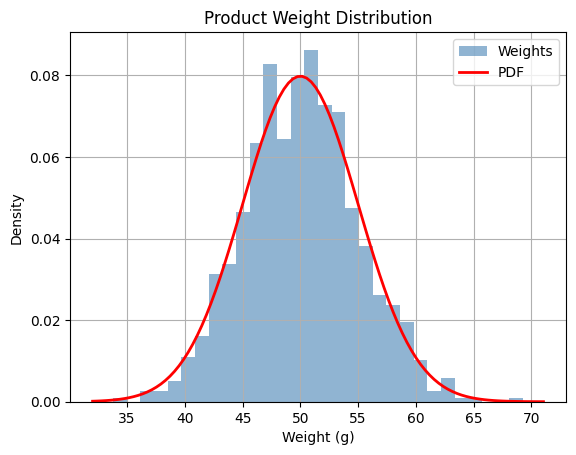

In [134]:
from scipy.stats import norm

# 시드 고정
np.random.seed(42)

# 정규분포 파라미터
mu = 50       # 평균
sigma = 5     # 표준편차
n = 1000      # 샘플 수

# 제품 무게 시뮬레이션
weights = np.random.normal(loc=mu, scale=sigma, size=n)

# 45g 이상 55g 이하 비율 계산
within_range = np.mean((weights >= 45) & (weights <= 55))

# 결과 출력
print(f"45g 이상 55g 이하인 제품의 비율: {within_range:.2%}")

# 히스토그램 그리기 (밀도 기반)
count, bins, ignored = plt.hist(weights, bins=30, density=True, alpha=0.6, color='steelblue', label='Weights')

# 정규분포 곡선 (PDF) 그리기
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r', linewidth=2, label='PDF')

# 라벨 및 제목
plt.title('Product Weight Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# 출력
plt.show()

### KPT

- Keep (잘한점)
: 오전 시간 개인 업무로 인해 늦게 시작했지만, 주어진 시간 안에 과제를 풀어서 제출했다.
- Problem (아쉬운점)
: 코드가 바로 바로 생각이 나지 않아서 찾는데 시간이 걸렸다.
- Try (개선할 점)
: 통계 지식을 튼튼히 하고, 코드가 손에 익도록 필사를 열심히 해야겠다.